In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Load the data
data = pd.read_csv('us_retail_sales.csv')

# Display basic information about the dataset
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


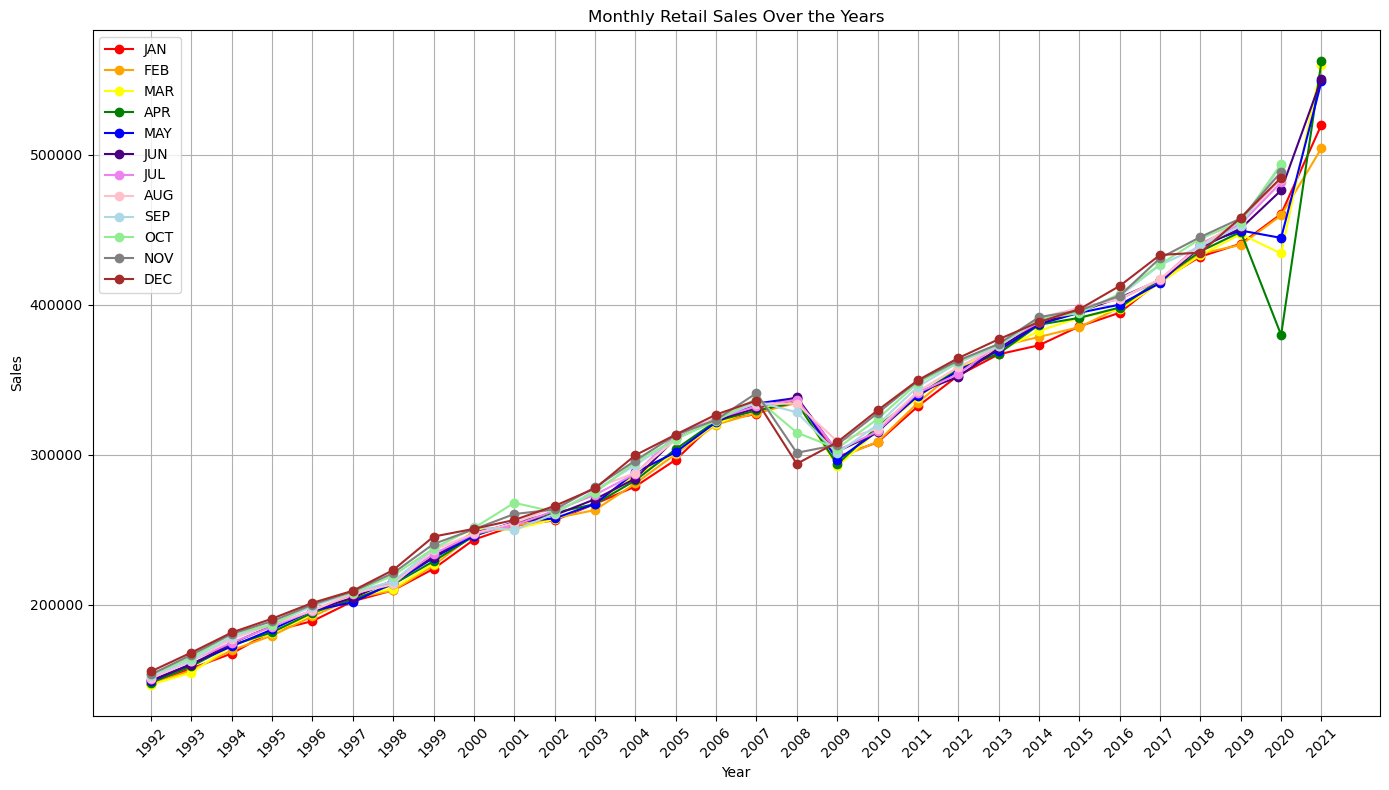

In [5]:
# Setting up the figure
plt.figure(figsize=(14, 8))

# Months in the dataset
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Custom color palette
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'lightblue', 'lightgreen', 'grey', 'brown']

# Looping through each month and plotting it with the specified color
for month, color in zip(months, colors):
    plt.plot(data['YEAR'], data[month], marker='o', label=month, color=color)

# Adding titles and labels
plt.title('Monthly Retail Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(data['YEAR'], rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Display a legend to identify each line
plt.grid(True)  # Display grid for easier analysis

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


Observations: There is a general upward trend in retail sales across all months over the years,
indicating growth in retail activity over time. The most recent years, 2020 and 2021, show significant volatility, likely due to the impact of the COVID-19 pandemic on consumer behavior and the economy. The noticeable spike in sales in certain months of 2021 could reflect a rebound in consumer spending after the initial shock of the pandemic.

In [1]:
# Load the dataset
data = pd.read_excel('us_retail_sales_21.xlsx')

# Prepare the data
years = data.columns[1:].astype(int)  # Year columns as integers
months = data.iloc[:, 0]  # Month names
monthly_sales = data.drop(columns=data.columns[0])  # Sales data without month names

# Flatten the data to have year-month combinations along with their sales
all_sales = monthly_sales.values.flatten()  # Flatten monthly sales data
year_month = [(year, month) for year in years for month in months]  # Year-month combinations

# Convert to DataFrame
df_all_sales = pd.DataFrame(year_month, columns=['Year', 'Month'])
df_all_sales['Sales'] = all_sales

# Define test period (July 2020 to June 2021)
test_start = (2020, 'JUL')
test_end = (2021, 'JUN')

# Create a mask for selecting the test set
is_test = (df_all_sales['Year'] == test_start[0]) & (df_all_sales['Month'].isin(months[6:])) | \
          (df_all_sales['Year'] == test_end[0]) & (df_all_sales['Month'].isin(months[:6]))

# Split the dataset into training and testing sets
train_data = df_all_sales[~is_test]
test_data = df_all_sales[is_test]

# Show the shape of the datasets and the first few rows to verify
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nFirst 5 Rows of Training Data:\n", train_data.head())
print("\nFirst 5 Rows of Test Data:\n", test_data.head())


Training Data Shape: (348, 3)
Test Data Shape: (12, 3)

First 5 Rows of Training Data:
    Year Month     Sales
0  1992   JAN  146925.0
1  1992   FEB  157555.0
2  1992   MAR  167518.0
3  1992   APR  182413.0
4  1992   MAY  189135.0

First 5 Rows of Test Data:
      Year Month     Sales
342  2020   JUL  299763.0
343  2020   AUG  313473.0
344  2020   SEP  326849.0
345  2020   OCT  336189.0
346  2020   NOV  294025.0


In [4]:

train_data = train_data.copy()
test_data = test_data.copy()

# Handling NaN values, and addressing the FutureWarning by specifying numeric_only=True
train_data.fillna(train_data.mean(numeric_only=True), inplace=True)
test_data.fillna(test_data.mean(numeric_only=True), inplace=True)

# Adding Month_num column again to ensure it exists
train_data['Month_num'] = train_data['Month'].apply(lambda x: months.tolist().index(x) + 1)
test_data['Month_num'] = test_data['Month'].apply(lambda x: months.tolist().index(x) + 1)

# Preparing the training and test sets
X_train = train_data[['Year', 'Month_num']]
y_train = train_data['Sales']
X_test = test_data[['Year', 'Month_num']]
y_test = test_data['Sales']

# Building and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Check for NaN values in the dataset
print("NaN values in training data:", train_data.isnull().sum().sum())
print("NaN values in test data:", test_data.isnull().sum().sum())

# Fill NaN values with the mean (or median) of the column
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


# Preparing the training and test sets again after handling NaN values
X_train = train_data[['Year', 'Month_num']]
y_train = train_data['Sales']
X_test = test_data[['Year', 'Month_num']]
y_test = test_data['Sales']

# Building and fitting the model again
model = LinearRegression()
model.fit(X_train, y_train)


NaN values in training data: 0
NaN values in test data: 0


C:\Users\bobby\AppData\Local\Temp\ipykernel_7172\556456052.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
C:\Users\bobby\AppData\Local\Temp\ipykernel_7172\556456052.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)


LinearRegression()

In [6]:

# Convert months to numerical values (1 for JAN, 2 for FEB, etc.)
train_data['Month_num'] = train_data['Month'].apply(lambda x: months.tolist().index(x) + 1)
X_train = train_data[['Year', 'Month_num']]
y_train = train_data['Sales']

model = LinearRegression()
model.fit(X_train, y_train)

# Preparing the test data in the same way
test_data['Month_num'] = test_data['Month'].apply(lambda x: months.tolist().index(x) + 1)
X_test = test_data[['Year', 'Month_num']]
y_test = test_data['Sales']

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Test RMSE: ", rmse)


Test RMSE:  45517.48199226642


In [8]:

# Make predictions on the test set
predictions = model.predict(X_test)

# Add predictions to the test data for comparison
test_data['Predicted_Sales'] = predictions

# Display the test data with actual and predicted sales
print(test_data[['Year', 'Month', 'Sales', 'Predicted_Sales']])



     Year Month     Sales  Predicted_Sales
342  2020   JUL  299763.0    317211.716739
343  2020   AUG  313473.0    319759.487872
344  2020   SEP  326849.0    322307.259005
345  2020   OCT  336189.0    324855.030138
346  2020   NOV  294025.0    327402.801271
347  2020   DEC  308413.0    329950.572404
348  2021   JAN  329627.0    302647.708198
349  2021   FEB  349744.0    305195.479331
350  2021   MAR  364488.0    307743.250464
351  2021   APR  377032.0    310291.021597
352  2021   MAY  388569.0    312838.792730
353  2021   JUN  397052.0    315386.563863
